In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import LabelEncoder

## Data Description
Source: https://www.kaggle.com/datasets/yasserh/loan-default-dataset/discussion/522084
<br> **ID**	client loan application id
<br> **year**	year of loan application
<br> **loan_limit**	indicates whether the loan is conforming (cf) or non-conforming (ncf)
<br> **Gender**	gender of the applicant (male, female, joint, sex not available)
<br> **approv_in_adv**	indicates whether the loan was approved in advance (pre, nopre)
<br> **loan_type**	type of loan (type1, type2, type3)
<br> **loan_purpose**	purpose of the loan (p1, p2, p3, p4)
<br> **Credit_Worthiness**	credit worthiness (l1, l2)
<br> **open_credit**	indicates whether the applicant has any open credit accounts (opc, nopc)
<br> **business_or_commercial**	indicates whether the loan is for business/commercial purposes (ob/c - business/commercial, nob/c - personal)
<br> **loan_amount**	amount of money being borrowed
<br> **rate_of_interest**	interest rate charged on the loan
<br> **Interest_rate_spread**	difference between the interest rate on the loan and a benchmark interest rate
<br> **Upfront_charges**	initial charges associated with securing the loan
<br> **term**	duration of the loan in months
<br> **Neg_ammortization**	indicates whether the loan allows for negative ammortization (neg_amm, not_neg)
<br> **interest_only**	indicates whether the loan has an interest-only payment option (int_only, not_int)
<br> **lump_sum_payment**	indicates if a lump sum payment is required at the end of the loan term (lpsm, not_lpsm)
<br> **property_value**	value of the property being financed
<br> **construction_type**	type of construction (sb - site built, mh - manufactured home)
<br> **occupancy_type**	occupancy type (pr - primary residence, sr- secondary residence, ir - investment property)
<br> **Secured_by**	specifies the type of collateral securing the loan (home, land)
<br> **total_units**	number of units in the property being financed (1U, 2U, 3U, 4U)
<br> **income**	applicant's annual income
<br> **credit_type**	applicant's type of credit (CIB - credit information bureau , CRIF - CIRF credit information bureau, EXP - experian , EQUI - equifax)
<br> **Credit_Score**	applicant's credit score
<br> **co-applicant_credit_type**	co-applicant's type of credit (CIB - credit information bureau EXP - experian)
<br> **age**	the age of the applicant.
<br> **submission_of_application**	indicates how the application was submitted (to_inst - to institution, not_inst - not to institution)
<br> **LTV**	loan-to-value ratio, calculated as the loan amount divided by the property value
<br> **Region**	geographic region where the property is located (North, south, central, North-East)
<br> **Security_Type**	type of security or collateral backing the loan (direct, indirect)
<br> **Status**	indicates whether the loan has been defaulted (1) or not (0)
<br> **dtir1**	debt-to-income ratio



## 1) Import Data

In [4]:
df = pd.read_csv(r"C:\Users\boeun\Downloads\archive\Loan_Default.csv")

In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


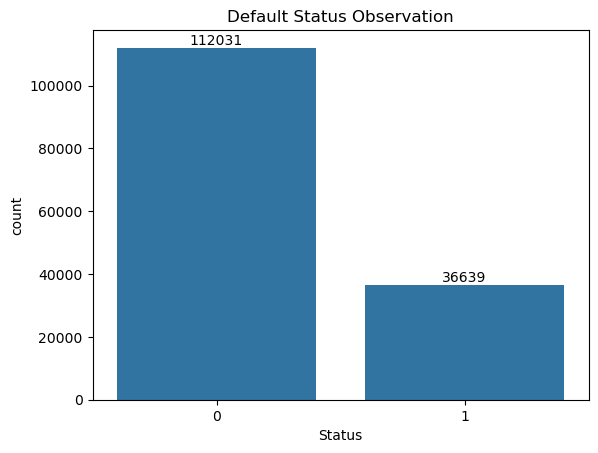

In [6]:
ax = sns.countplot(x = 'Status', data=df)
ax.bar_label(ax.containers[0])
plt.title("Default Status Observation")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [8]:
df.shape

(148670, 34)

In [9]:
df.drop_duplicates(subset=['ID'], inplace=True)

In [10]:
df.shape  # There were no duplicate records

(148670, 34)

## 2) Preprocess Data

In [12]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [13]:
df2 = df.copy()

In [14]:
# Encode to numerical values
le = LabelEncoder()

obj_columns = [col for col in df2.columns if df2[col].dtype == 'object']
for col in obj_columns:
    df2[col] = le.fit_transform(df2[col])

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  int32  
 3   Gender                     148670 non-null  int32  
 4   approv_in_adv              148670 non-null  int32  
 5   loan_type                  148670 non-null  int32  
 6   loan_purpose               148670 non-null  int32  
 7   Credit_Worthiness          148670 non-null  int32  
 8   open_credit                148670 non-null  int32  
 9   business_or_commercial     148670 non-null  int32  
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## 3) Random Forest

In [17]:
df3 = df2.copy()

In [18]:
X = df3.drop('Status', axis=1) 
y = df3['Status']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
pred = clf_rf.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, pred):.2%}')

Accuracy Score: 100.00%


In [22]:
confusion_matrix(y_test, pred)

array([[33687,     0],
       [    1, 10913]], dtype=int64)

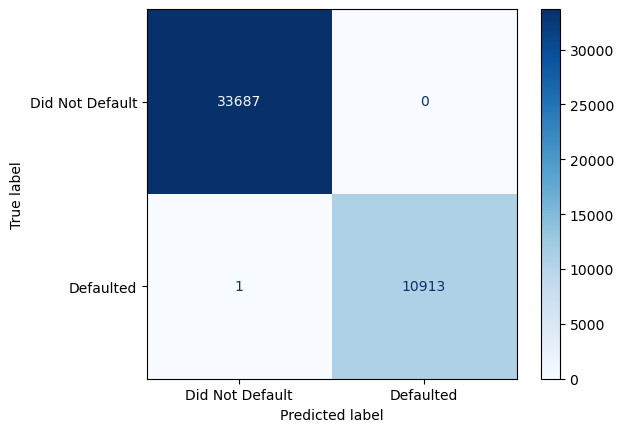

In [23]:
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(clf_rf, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)

In [24]:
df['term'].value_counts(dropna=False)              # Drop NaN Values as the count is relatively small

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
NaN          41
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: count, dtype: int64

In [25]:
df['Neg_ammortization'].value_counts(dropna=False)          # Drop NaN values; Either negative ammortization or not

Neg_ammortization
not_neg    133420
neg_amm     15129
NaN           121
Name: count, dtype: int64

In [26]:
df['age'].value_counts(dropna=False)                        # Drop NaN values as there is no other possible age group

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
NaN        200
Name: count, dtype: int64

In [27]:
df['submission_of_application'].value_counts(dropna=False)  # Drop NaN values; Either to institution or not

submission_of_application
to_inst     95814
not_inst    52656
NaN           200
Name: count, dtype: int64

In [28]:
df['property_value'].value_counts(dropna=False)

property_value
NaN          15098
308000.0      2792
258000.0      2763
358000.0      2679
408000.0      2537
             ...  
4648000.0        1
3878000.0        1
5758000.0        1
2618000.0        1
2698000.0        1
Name: count, Length: 386, dtype: int64

In [29]:
print(df['property_value'].mean())
print(df['property_value'].median())  # mean ~ median; assume normality and replace with median 

497893.46569640347
418000.0


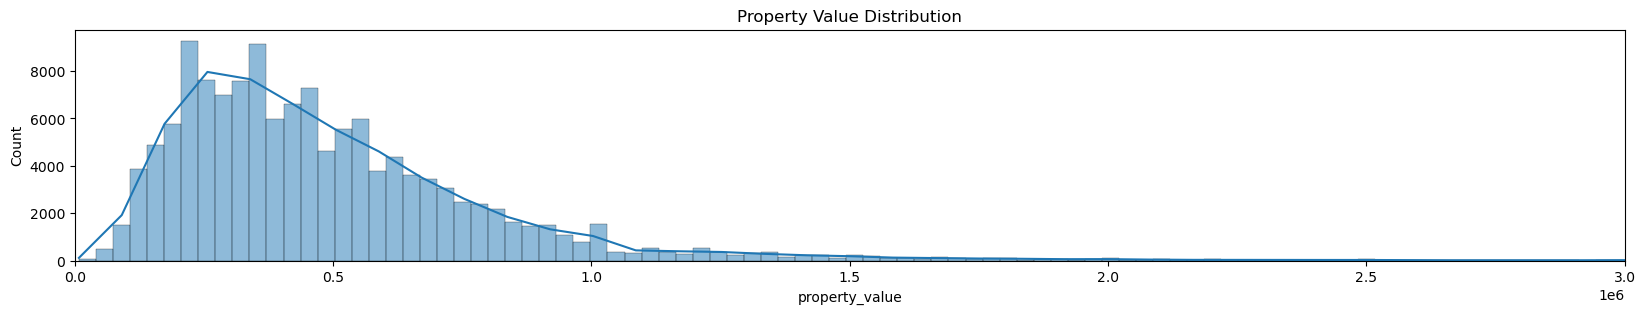

In [30]:
plt.figure(figsize=(20, 3))
sns.histplot(df['property_value'], kde=True, bins=500)
plt.xlim(0, 0.3e7)
plt.title('Property Value Distribution')
plt.show()

In [31]:
df['income'].value_counts(dropna=False)         

income
NaN         9150
0.0         1260
3600.0      1250
4200.0      1243
4800.0      1191
            ... 
45300.0        1
154440.0       1
137760.0       1
145560.0       1
79920.0        1
Name: count, Length: 1002, dtype: int64

In [32]:
print(df['income'].mean())
print(df['income'].median())  # mean ~ median; assume normality and replace with median      

6957.338876146789
5760.0


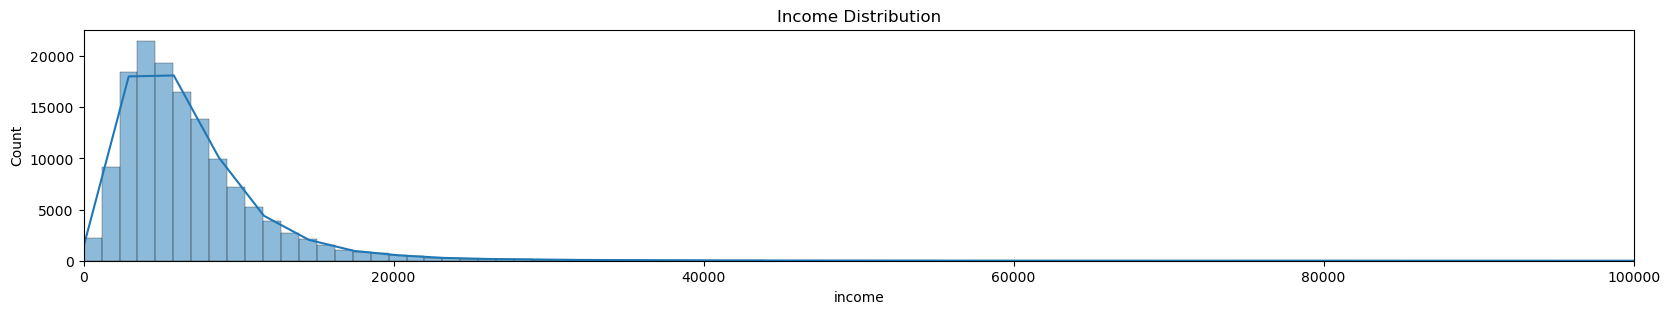

In [33]:
plt.figure(figsize=(20, 3))
sns.histplot(df['income'], kde=True, bins=500)
plt.xlim(0, 100000)
plt.title('Income Distribution')
plt.show()

In [34]:
df['LTV'].value_counts(dropna=False)                        

LTV
NaN          15098
81.250000      530
91.666667      499
80.038760      380
80.032468      328
             ...  
33.598066        1
13.618746        1
55.981445        1
50.175070        1
32.802013        1
Name: count, Length: 8485, dtype: int64

In [35]:
print(df['LTV'].mean())
print(df['LTV'].median())  # mean ~ median; assume normality and replace with median 

72.74645733387138
75.13586957


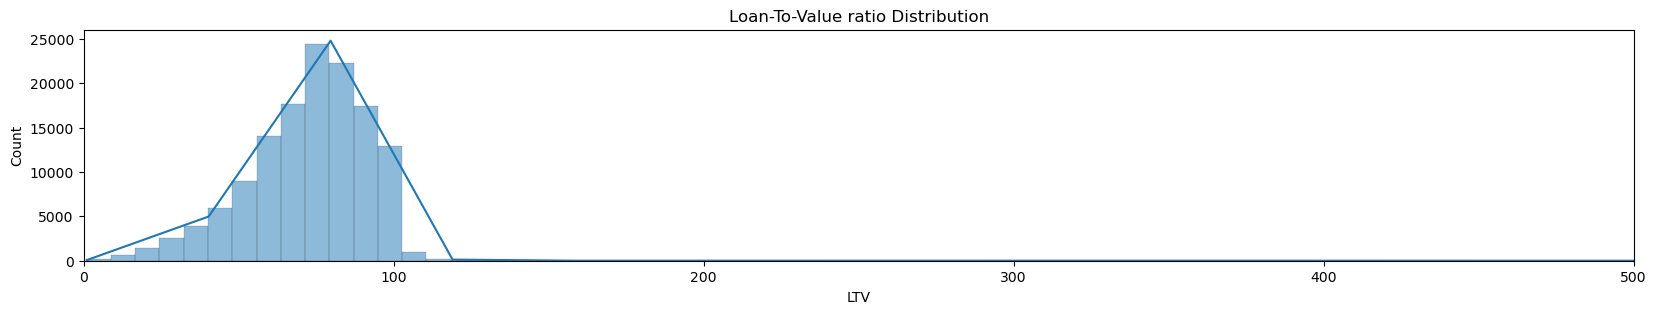

In [36]:
plt.figure(figsize=(20, 3))
sns.histplot(df['LTV'], kde=True, bins=1000)
plt.xlim(0, 500)
plt.title('Loan-To-Value ratio Distribution')
plt.show()

In [37]:
# Drop the following columns
df2 = df.drop(['ID', 'year', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'dtir1'], axis=1)

In [38]:
# Drop NaN values

df2 = df.dropna(axis=0)    # df.dropna(axis=0, inplace=True)

# df2.dropna(subset = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization', 'age', 'submission_of_application'], inplace=True)

In [39]:
# Fill NaN with median
# df2['property_value'] = df2['property_value'].fillna(df2['property_value'].median())
# df2['income'] = df2['income'].fillna(df2['income'].median())
# df2['LTV'] = df2['LTV'].fillna(df2['LTV'].median())

In [40]:
df2.shape

(98187, 34)

In [41]:
df2.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

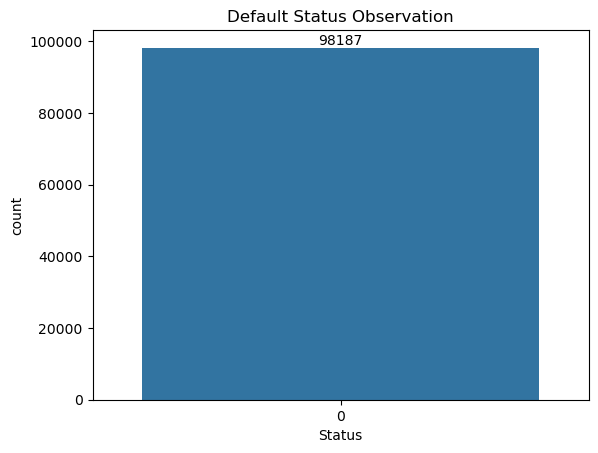

In [42]:
ax = sns.countplot(x = 'Status', data=df2)
ax.bar_label(ax.containers[0])
plt.title("Default Status Observation")
plt.show()

In [43]:
df3 = df2.copy()
df3.dropna(axis=0, inplace=True)
df3.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [44]:
X = df3.drop('Status', axis=1)  
y = df3['Status']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
pred = model.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, pred):.2%}')

In [ ]:
confusion_matrix(y_test, pred)

In [ ]:
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)

In [ ]:
print(classification_report(y_test , pred))